In [137]:
import pandas as pd
import geojson
from shapely.geometry import shape, Point
import folium
import numpy as np

#grab the data for the entertainment license
license_df = pd.read_csv("liscences.csv") 
calculated_coordinates_df = pd.read_csv("gps_coords_entertainment.csv") 
license_df["latitude"] = calculated_coordinates_df["latitude"]
license_df["longitude"] = calculated_coordinates_df["longitude"]

print(len(license_df.index))

#get rid of rows that whose coordinates are not availible (could change later to see if any of the removed rows are from a district 4 police branch ["C-11", "E-13", "B-3", "E-18", "B-2"])
license_df_copy = license_df.dropna(subset=["latitude", "longitude"])

#filter out businesses that are not within the shape file

with open("City_Council_Districts_View.geojson") as f:
    gj = geojson.load(f)

feature = gj['features'][6]
district4 = shape(feature['geometry'])

districtMap = folium.Map(location=[42.333943, -71.130000],zoom_start = 13)
folium.GeoJson(data=district4).add_to(districtMap)
df4 = license_df.copy()


district4 = shape(gj['features'][6]['geometry'])
# Filtering data set for district 4 businesses only
df4 = license_df_copy[license_df_copy.apply(lambda x: Point(x.longitude,x.latitude).within(district4), axis=1)]

"""print(len(license_df.index))
#separate the data into differnet districts (as many as the file contains) using the shape file if there are geo cords or if not by town and adress?
#district 4 police districts are ["C-11", "E-13", "B-3", "E-18", "B-2"] as per https://www.boston.gov/sites/default/files/file/2020/03/D4-Resource-Guide-1.pdf
distict_4_licenses = license_df[(license_df["police_dist"] == "C-11") | (license_df["police_dist"] == "E-13") | (license_df["police_dist"] == "B-3") |
(license_df["police_dist"] == "E-18") | (license_df["police_dist"] == "B-2")]"""

print(len(df4.index))


#generate descriptive statistics for how many liscenses each district has of each type
clusterD4Map =  folium.Map(location=[42.305682,-71.081282],zoom_start = 14)
x = np.arange(20)
ys = [i + x + (i*x)**2 for i in range(20)]


count = 0
for lat,lng in zip(df4['latitude'], df4['longitude']):
    count += 1
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        fill=True,
        fill_opacity=0.9).add_to(clusterD4Map)


#Map for only district 4 businesses
clusterD4Map

#reason about how the liscenses in district 4 compare to other districts

#generate graphics

4525
65


<BarContainer object of 9 artists>

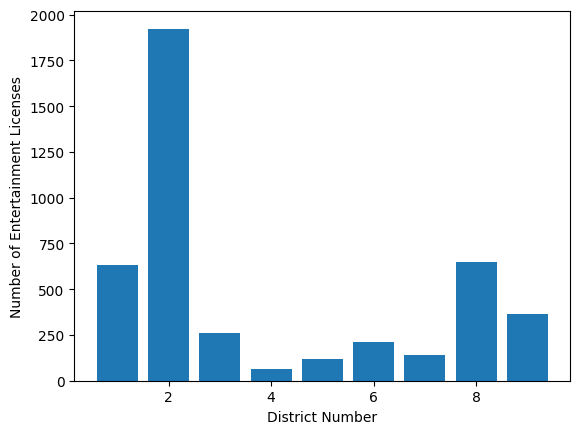

In [146]:
import matplotlib.pyplot as plt

#plot chart for liscenses per district
district_names = []
total_num_licenses = []
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    district_names.append(district)
    boundaries = shape(gj['features'][i]['geometry'])
    num_licenses = len(license_df_copy[license_df_copy.apply(lambda x: Point(x.longitude,x.latitude).within(boundaries), axis=1)])
    total_num_licenses.append(num_licenses)
    #print(district_names, total_num_licenses)
    plt.xlabel("District Number")
    plt.ylabel("Number of Entertainment Licenses")
plt.bar(x=district_names,height=total_num_licenses)

In [144]:


#create new df column with district number
def district_from_cords(lat, long):
    for i in range(len(gj['features'])):
        district = gj['features'][i]['properties']['DISTRICT']
        boundaries = shape(gj['features'][i]['geometry'])
        if Point(long, lat).within(boundaries):
            return district
    return "1" #default should never reach

license_df_copy["district"] = license_df_copy.apply(lambda x : district_from_cords(x.latitude, x.longitude), axis=1)


#plot map of liscenses per district

clusterD4Map =  folium.Map(location=[42.305682,-71.081282],zoom_start = 12)
x = np.arange(20)
ys = [i + x + (i*x)**2 for i in range(20)]
colors_arr = ["green", "purple", "red", "blue", "orange", "violet", "black", "yellow" ,"brown"]

for lat,lng,clusters in zip(license_df_copy['latitude'], license_df_copy['longitude'],  license_df_copy['district']):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        
        color=colors_arr[clusters-1],
        fill=True,
        fill_color=colors_arr[clusters-1],
        fill_opacity=0.9).add_to(clusterD4Map)

#Map for only district 4 businesses
clusterD4Map



/var/folders/k5/lftrq04906529_0xd53z6vdw0000gn/T/ipykernel_13656/2481636359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  license_df_copy["district"] = license_df_copy.apply(lambda x : district_from_cords(x.latitude, x.longitude), axis=1)


In [145]:
new = license_df_copy[license_df_copy["district"] == 4]
print(new["business_name"].value_counts())

print("Total number of businesses: " + str(len(new["business_name"].value_counts())))


186 HARVARD AVE BAR LLC               9
The Twelve Bens, Inc.                 8
Unity Sports & Cultural Club, Inc.    7
B. Stone, Inc.                        7
Identity Food LLC                     6
Kay's Oasis Enterprises Inc.          6
Boston Police Post #1018 V.F.W.       4
GEORGE'S RESTAURANT & LOUNGE, INC.    4
Nguyen's Restaurant Inc               3
Only One Jamaican Restaurant, Inc.    3
Ashmont Grill LLC                     3
JP Thai Group, Inc.                   2
BON APPETIT RESTAURANT, INC.          2
Sweet Sip                             1
Name: business_name, dtype: int64
Total number of businesses: 14
